In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

In [2]:
datapath = 'https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2014/results.csv'
df = pd.read_csv(datapath)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
10k          31984 non-null object
name         31984 non-null object
division     31984 non-null int64
25k          31984 non-null object
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
ctz          1244 non-null object
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31984 non-null object
5k           31984 non-null object
half         31984 non-null object
20k          31984 non-null object
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 5.1+ MB


In [4]:
pd.set_option('display.max_columns', None)
df.head(10)

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,71.40,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,116.37,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,67.42,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,116.37,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,67.83,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72
5,32.58,"Sumgong, Jemima Jelagat",4,82.45,F,29,140.68,F3,4,NaN,116.37,28,5.37,NaN,99.33,16.22,69.47,65.83,KEN,Nandi,132.95
6,17.65,"Hug, Marcel E.",4,47.67,M,28,84.65,W4,4,NaN,70.23,4,3.23,NaN,58.60,8.38,39.72,37.65,SUI,Neuenkirch,79.83
7,30.48,"Geneti, Markos",5,76.95,M,29,129.83,5,5,NaN,107.47,5,4.97,NaN,92.52,15.17,64.85,61.62,ETH,Addis Ababa,122.80
8,17.12,"Soejima, Masazumi",3,46.37,M,43,81.23,W6,3,NaN,67.83,3,3.10,NaN,57.03,8.00,38.60,36.60,JPN,Isahaya,76.70
9,30.48,"Hall, Ryan",20,77.68,M,31,137.83,6,20,NaN,112.27,20,5.27,CA,94.78,15.15,65.23,61.78,USA,Redding,129.83


In [5]:
df.nunique()

10k           2766
name         31915
division      6979
25k           6570
gender           2
age             64
official     11030
bib          31984
genderdiv    17575
ctz             84
35k           9516
overall      31931
pace           727
state           68
30k           8090
5k            1491
half          5651
20k           5375
country         78
city          5934
40k          10546
dtype: int64

In [6]:
df['age'].unique()

array([47, 33, 41, 24, 40, 29, 28, 43, 31, 30, 49, 34, 26, 38, 27, 35, 23,
       36, 32, 45, 25, 19, 21, 20, 22, 46, 39, 37, 53, 59, 18, 52, 44, 42,
       48, 51, 50, 56, 58, 55, 54, 60, 57, 67, 65, 62, 61, 66, 68, 64, 63,
       73, 72, 70, 76, 69, 77, 71, 74, 75, 81, 78, 80, 79])

In [7]:
df.drop(['name', 'state', 'country', 'bib', 'city', 'ctz'],1, inplace=True)

In [8]:
#df['over60'] = np.where(df['age']>60, 1, 0)
df['gender'] = np.where(df['gender']=='M', 1, 0)

In [9]:
df.head(20)

,10k,division,25k,gender,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k
0,17.37,8,47.67,1,47,85.25,8,71.40,8,3.27,59.18,8.02,39.72,37.65,80.43
1,32.58,1,82.43,0,33,138.95,1,116.37,21,5.30,99.33,16.22,69.47,65.83,132.10
2,16.62,1,45.80,1,41,80.60,1,67.42,1,3.08,56.45,7.75,38.03,36.10,76.10
3,32.57,3,82.43,0,24,140.58,3,116.37,27,5.37,99.33,16.20,69.47,65.83,132.95
4,17.12,2,46.37,1,40,81.23,2,67.83,2,3.10,57.03,8.02,38.60,36.58,76.72
5,32.58,4,82.45,0,29,140.68,4,116.37,28,5.37,99.33,16.22,69.47,65.83,132.95
6,17.65,4,47.67,1,28,84.65,4,70.23,4,3.23,58.60,8.38,39.72,37.65,79.83
7,30.48,5,76.95,1,29,129.83,5,107.47,5,4.97,92.52,15.17,64.85,61.62,122.80
8,17.12,3,46.37,1,43,81.23,3,67.83,3,3.10,57.03,8.00,38.60,36.60,76.70
9,30.48,20,77.68,1,31,137.83,20,112.27,20,5.27,94.78,15.15,65.23,61.78,129.83


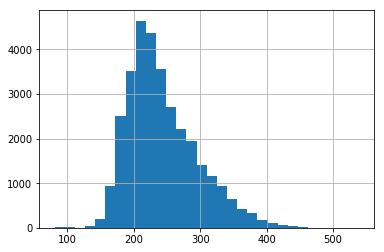

In [10]:
df.official.hist(bins=30)

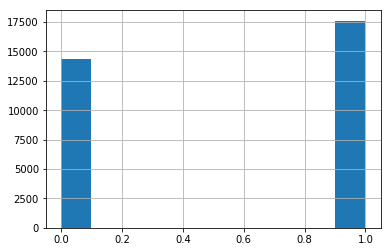

In [11]:
df.gender.hist()

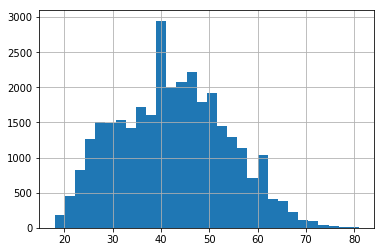

In [34]:
df.age.hist(bins=30)

In [13]:
df.mean()

division      1932.563032
gender           0.550807
age             42.407079
official       242.997314
genderdiv     8051.044741
overall      15939.587825
pace             9.275658
dtype: float64

In [14]:
df = df[pd.to_numeric(df['half'], errors='coerce').notnull()]
df["half"] = df.half.astype(float)

In [15]:
features = pd.DataFrame()
features['age'] = df['age']
features['official'] = df['official']
#features['overall'] = df['overall']
features['gender'] = df['gender']
features['half'] = df['half']


In [16]:
features = features[pd.to_numeric(features['half'], errors='coerce').notnull()]

In [17]:
features["half"] = features.half.astype(float)

In [18]:
features = features.dropna()

In [19]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31912 entries, 0 to 31983
Data columns (total 4 columns):
age         31912 non-null int64
official    31912 non-null float64
gender      31912 non-null int64
half        31912 non-null float64
dtypes: float64(2), int64(2)
memory usage: 1.2 MB


In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

X = features

# Normalize
X_norm = normalize(X)

# Halve
X_half1, X_half2 = train_test_split(
    X_norm,
    test_size=0.5,
    random_state=42)

# Then we halve the halves.
X1, X2 = train_test_split(
    X_half1,
    test_size=0.5,
    random_state=42)
X3, X4 = train_test_split(
    X_half2,
    test_size=0.5,
    random_state=42)

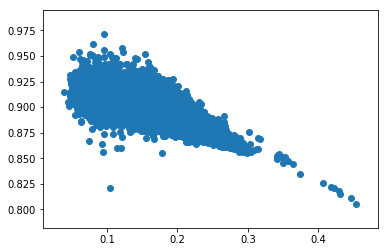

In [21]:
plt.scatter(X_norm[:, 0], X_norm[:, 1])
plt.show()

In [22]:
Xs = [X1,X2,X3,X4]

In [23]:
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth, SpectralClustering, AffinityPropagation
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics

#all data
clusters = [2,3,4,5,8,16]
for i in clusters:
    print("Number of defined clusters: {}".format(i))
    for j in Xs:
        model = KMeans(n_clusters=i, random_state=None).fit(j)
        labels = model.labels_
        print(metrics.silhouette_score(j, labels, metric='euclidean'))

Number of defined clusters: 2
0.4662658415067356
0.47238007824131906
0.46734344237367426
0.4670271194539653
Number of defined clusters: 3
0.3835418834912303
0.3840601556771634
0.3832824245242958
0.38295479046410147
Number of defined clusters: 4
0.3803252643343673
0.3852007759811385
0.3854293108438478
0.3928716546511637
Number of defined clusters: 5
0.34839019004725963
0.35289978218536755
0.35784472649284643
0.3590529077835118
Number of defined clusters: 8
0.333378866693776
0.33807716202300525
0.33487474535740086
0.345216066838814
Number of defined clusters: 16
0.3202157805607234
0.3153611696883053
0.3227471907100982
0.3195802337986156


In [24]:
model = KMeans(n_clusters=4, random_state=None)
model.fit(X_norm)    
labels = model.labels_ # Extract cluster assignments for each data point. 

In [25]:
labels.shape

(31912,)

In [26]:
features['label'] = labels

In [27]:
plot_df = features.groupby('label')['age','official', 'half', 'gender'].mean().sort_values(by='label',ascending=True).reset_index()

In [28]:
plot_df.head()

,label,age,official,half,gender
0,0,52.214239,216.560413,101.957409,0.796009
1,1,47.395073,277.644090,117.385221,0.664005
2,2,30.788317,277.565482,125.856312,0.350130
3,3,40.556343,224.532650,106.743340,0.440016


In [45]:
sns.set(palette='muted')

0 = Young slow women
1 = Old fast women
2 = Old fast men
3 = Young slow men

/home/ebicher/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


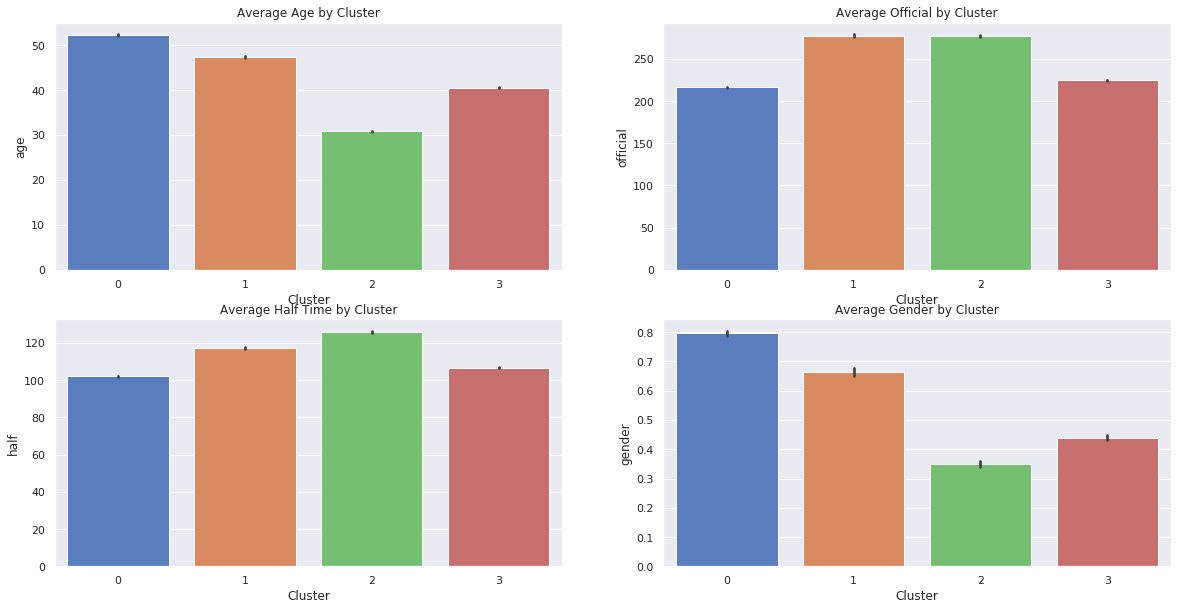

In [46]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.barplot(x='label',y='age', data=features)
plt.xlabel('Cluster')
plt.title('Average Age by Cluster')

plt.subplot(2,2,2)
sns.barplot(x='label',y='official', data=features)
plt.xlabel('Cluster')
plt.title('Average Official by Cluster')

plt.subplot(2,2,3)
sns.barplot(x='label',y='half',data=features)
plt.xlabel('Cluster')
plt.title('Average Half Time by Cluster')

plt.subplot(2,2,4)
sns.barplot(x='label',y='gender',data=features)
plt.xlabel('Cluster')
plt.title('Average Gender by Cluster')
plt.show()


0 = Young slow men

1 = Old fast men

2 = Old fast women

3 = Young slow women

/home/ebicher/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Official time by Age')

<Figure size 1440x720 with 0 Axes>

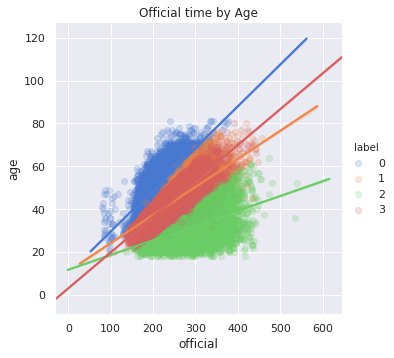

In [47]:
plt.figure(figsize=(20,10))
sns.lmplot(x='official',y='age',hue='label',data=features, scatter_kws={'alpha':0.2})
plt.title('Official time by Age')


/home/ebicher/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1080x648 with 0 Axes>

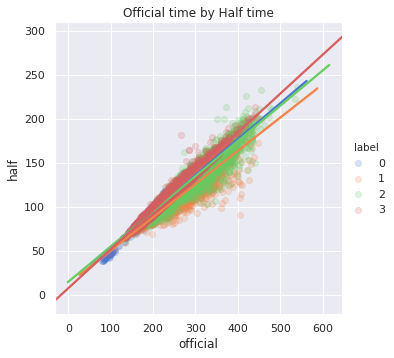

In [48]:
plt.figure(figsize=(15,9))
sns.lmplot(x='official',y='half',hue='label',data=features, scatter_kws={'alpha':0.2})
plt.title('Official time by Half time')
plt.show()
